# Multi_plots documentation:

This notebook demonstrates examples of multi-panel plotting ACS Hazard maps.

The functions required are in the acs_plotting maps module.

You will need to provide the xarray datasets to the functions and specify the text labels and colorbar information etc..

All the following multi-panel plotting functions use the same plotting helper function which is the basis of plot_acs_hazard. 

The functions have a range of options to modify the plots. Some of these are required, and many are optional. Here’s a list of the minimum things you will need to provide:

-	The data for different GWLs:
    -   for gridded data:
        -	ds_gwl12
        -	ds_gwl15
        -	ds_gwl20
        -	ds_gwl30
    -   for station data, dataframe with lat lon and variable columns to plot point-based data, eg tide gauge data.
        -   station_df_gwl12
        -   station_df_gwl15
        -   station_df_gwl20
        -   station_df_gwl30
-   Stippling for each GWL. Stippling xarray dataarray with a True/False mask to stipple over areas of significance or robustness
    -   stippling_gwl12
    -   stippling_gwl15
    -   stippling_gwl20
    -   stippling_gwl30
-	Descriptive titles:
    -	title
    -	date_range (subtitle eg the time range of your plots)
    -	baseline (if any of your data are anomalies)
    -	tick_labels (for categorical data only)
    -	cbar_label (title for colorbar)
    -	dataset_name 
    -	watermark (if this is the final publishable figure set watermark="")
-	color scale specifications:
    -	cmap (the colormap color scheme)
    -	ticks (the levels of the colormap normalisation. Set something consistent so that all the figures can share the one colorbar)
    -	cbar_extend ([“min”, “max”, “both”, “neither”] controls the arrows on the colorbar. Indicates whether or not there are physical values beyond the color scale provided.)
-	save the figure:
    -	outfile defines the file that the figure is saved to.
There are many options within the plotting function that can modify the plot for different purposes. Most of the time, the default options will not need to be changed to produce a good figure.
-	Change region outlines:
    -	name use this to draw borders from different shapefiles:
    	["aus_local_gov",
    	"aus_states_territories",
    	"australia", 
    	"broadacre_regions", 
    	"NCRA_Marine_region",
    	"ncra_regions", 
    	"NCRA_regions_coastal_waters_GDA94", 
    	"nrm_regions",
    	"plantations"]
    -	Regions to specify your own regions outlines from a geopandas.GeoDataFrame
-	Mask different areas:
    -	By default, the area outside Australia (~ocean) is masked. If you want to show hazard information over the ocean set mask_not_australia = False
    -	If you want to show hazard information over the ocean, you may want to mask the Australian land area using mask_australia = True
    -	If you want to fill in your regions with color, eg you are only plotting point station data, you can specify the colour using facecolor=”lightgrey”
    -	If your data is dodgy due to limited ACGD observations in remote inland Australia, (eg rainfall related hazard data) you can mask this area using agcd_mask=False
    -	If your colormap and agcd_mask are incompatible, you may want to change the default missing data color from “lightgrey”. For example, change cmap_bad=”white”.
    -	Select one or more regions/states to show the data only for these selected regions using select_area. Fill in the non-selected areas using land_shadow=True.
-	Plotting ocean data
    -	If you want to show hazard information over the ocean set mask_not_australia = False
    -	If you want to show hazard information over the ocean, you may want to mask the Australian land area using mask_australia = True
    -	You may want to change the projection using crs
    -	Change the lat lon limits to encompass a larger region: xlim, ylim
-	Make adjustments to the figure:
    -	Change the figure size or aspect using figsize
    -	Change the projection using crs
    -	Change the lat lon limits to encompass a different region: xlim, ylim
    -	Change the region's edgecolor and area_linewidth
    -	Select one or more regions/states to show the data only for these selected regions using select_area. Fill in the non-selected areas using land_shadow=True.
    -	Change the watermark text and watermark_color
    -	Smooth the gridded data using contourf and/or outline the contour edges in grey using contour. Only recommended for relatively coarse-gridded data, otherwise, it takes a lot of computation. Errors may occur using contourf and contour and certain projections (including the default lambertConformal projection) 
-	Options only available for plot_acs_hazard (soon to be added to multipanel plotting)
    -	Station_df dataframe with lat lon and variable columns to plot point-based data, eg tide gauge data.
    -	Stippling xarray dataarray with a True/False mask to stipple over areas of significance or robustness.

*plot_acs_hazard_4pp* takes four xarray data arrays with shared colourmaps and plots them in one of three arrangements. These arrangements are “vertical” (1-by-4), “horizontal” (4-by-1), and “square” (2-by-2). The arrangement you want will likely depend on your intended presentation format, e.g. poster, PowerPoint, or print. The assumption is that the four plots represent the same hazard for four different global warming levels (GWLs).

*plot_acs_hazard_1plus3* takes four xarray data arrays, all plotting the same hazard for four different global warming levels (GWLs). However, the first panel shows the baseline GWL1.2 and the following three plots show the anomaly from that baseline. The first panel has a different colorbar to the three future scenario anomalies.

If you are only interested in the three future scenarios, then you may use the plot_acs_hazard_3pp function. It takes three xarray data arrays with shared colorbars and labels and plots them in a shared figure. At the moment, these figures only have horizontal alignment.





In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm

regions = regions_dict['ncra_regions']

CPU times: user 15.6 s, sys: 1.21 s, total: 16.8 s
Wall time: 18.8 s


In [3]:
# example with station data
# notice the custom subplot titles

CPU times: user 31.7 s, sys: 77.8 ms, total: 31.8 s
Wall time: 32.8 s


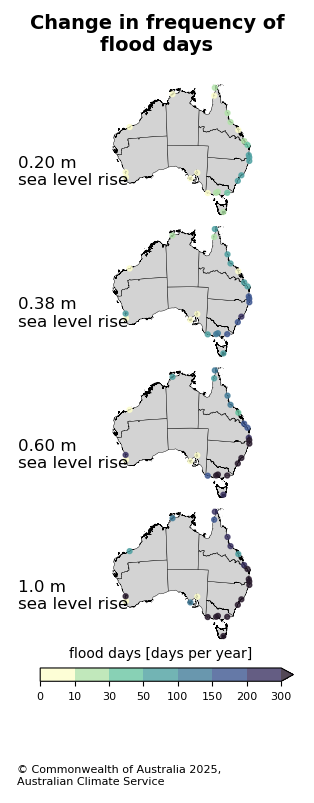

In [4]:
%%time 

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_days/minor_exceeds_means_diff.csv")

plot_acs_hazard_4pp(station_df_gwl12=df[["lat", "lon", "0.2m 50th percentile"]].sort_values("0.2m 50th percentile"),
                    station_df_gwl15=df[["lat", "lon", "0.38m 50th percentile"]].sort_values("0.38m 50th percentile"),
                    station_df_gwl20=df[["lat", "lon", "0.6m 50th percentile"]].sort_values("0.6m 50th percentile"),
                    station_df_gwl30=df[["lat", "lon", "1.0m 50th percentile"]].sort_values("1.0m 50th percentile"),
                    regions = regions,
                    cmap=cmap_dict["pr_1"],
                    ticks=[0,10,30,50,100, 150,200, 300],
                    cbar_extend="max",
                    title = "Change in frequency of flood days",
                    cbar_label = "flood days [days per year]",
                    watermark=None,
                    facecolor="lightgrey",
                    orientation="vertical",
                     subplot_titles=[f"\n{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
                     issued_date="",
                    tick_rotation=0,);

CPU times: user 1.6 s, sys: 7.23 ms, total: 1.61 s
Wall time: 1.69 s


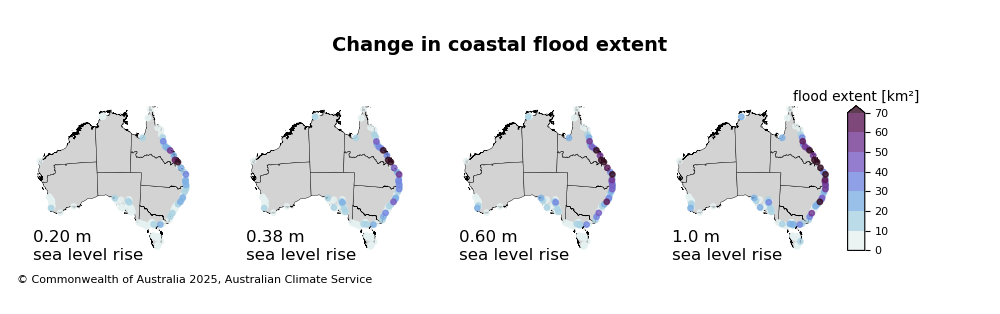

In [5]:
%%time 

var = "ext_50"

df = pd.read_csv("/g/data/ia39/ncra/coastal/flood_extents/inundation_stats/results_2020_change.csv")

plot_acs_hazard_4pp(station_df_gwl12=df.where(df["SLR"]==0.2).dropna()[["lat", "lon", var]].sort_values(var),
                        station_df_gwl15=df.where(df["SLR"]==0.38).dropna()[["lat", "lon", var]].sort_values(var),
                        station_df_gwl20=df.where(df["SLR"]==0.60).dropna()[["lat", "lon", var]].sort_values(var),
                        station_df_gwl30=df.where(df["SLR"]==1.00).dropna()[["lat", "lon", var]].sort_values(var),
                        regions = regions,
                        cmap=cmap_dict["xts_freq"],
                        ticks=np.arange(0,71,10),
                        cbar_extend="max",
                        title = "Change in coastal flood extent",
                        cbar_label = "flood extent [km\N{SUPERSCRIPT TWO}]",
                        watermark=None,
                        facecolor="lightgrey",
                       orientation="horizontal",
                       subplot_titles=[f"{slr} m\nsea level rise" for slr in ["0.20", "0.38", "0.60", "1.0"]],
                        issued_date="",
                        tick_rotation=0,
);

In [6]:
# example with stippling
# you don't have to define stippling for all GWLs
# the stippling dataset and the hazard dataset do not have tobe the same resolution
# if the stippling data is not smooth, you may want to coarsen the stippling dataset
# easily change the orientation of the multi-panel plots by using the "orientation" keyword argument

CPU times: user 12 s, sys: 1.43 s, total: 13.4 s
Wall time: 17.2 s


(<Figure size 600x450 with 6 Axes>,
 array([[<GeoAxes: >, <GeoAxes: >],
        [<GeoAxes: >, <GeoAxes: >]], dtype=object))

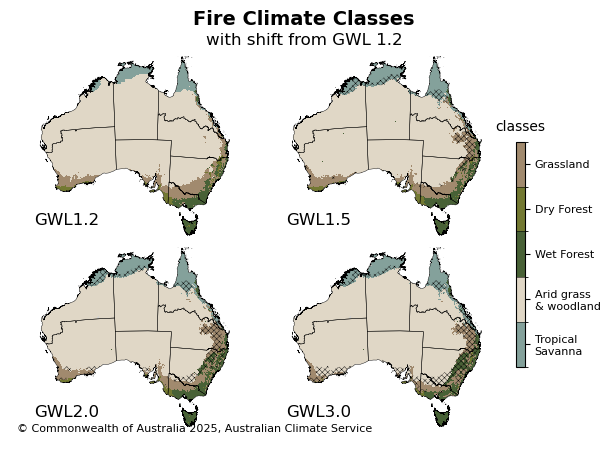

In [7]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                        stippling_gwl15 = stippling_gwl15,
                        stippling_gwl20 = stippling_gwl20,
                        stippling_gwl30 = stippling_gwl30,
                        title = "Fire Climate Classes",
                        cmap = cmap_dict["fire_climate"],
                        ticks = tick_dict["fire_climate_ticks"],
                        tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                        cbar_label = "classes",
                        watermark="",
                        date_range="with shift from GWL 1.2",
                       orientation="square",
                    issued_date="",
                    tick_rotation=0,
                        )

CPU times: user 6.38 s, sys: 80.4 ms, total: 6.47 s
Wall time: 6.97 s


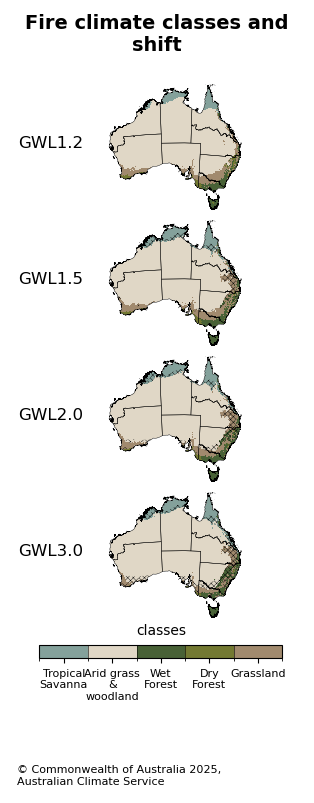

In [8]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and shift",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n&\nwoodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    tick_rotation=0,
                    );

CPU times: user 6.53 s, sys: 62.2 ms, total: 6.59 s
Wall time: 6.59 s


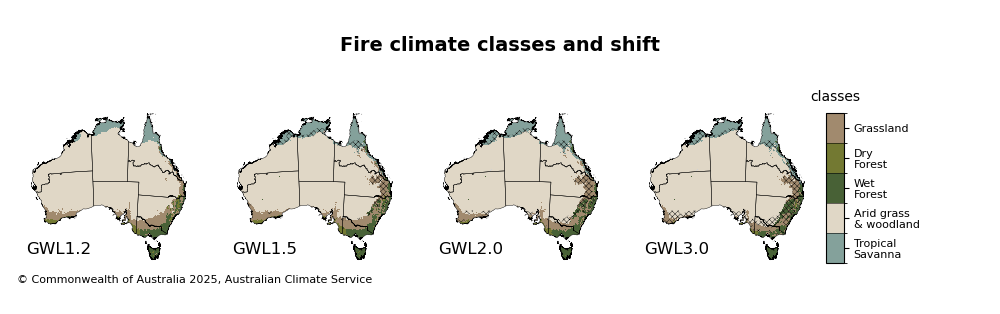

In [9]:
%%time 

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_4pp(ds_gwl12=ds_gwl12[var],
                    ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    stippling_gwl15=stippling_gwl15,
                    stippling_gwl20=stippling_gwl20,
                    stippling_gwl30=stippling_gwl30,
                    regions = regions,
                    title = "Fire climate classes and shift",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n& woodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date = "",
                    orientation="horizontal",
                    tick_rotation=0,
                    );

(<Figure size 1000x400 with 4 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

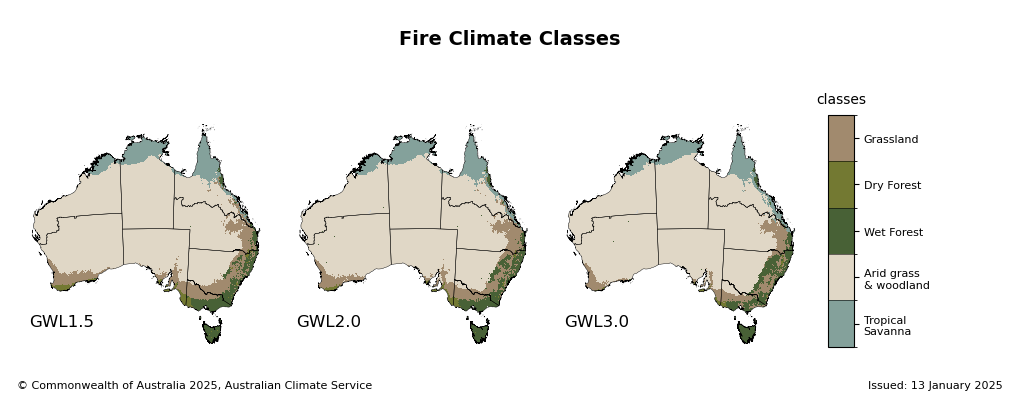

In [10]:
plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    title = "Fire Climate Classes",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="horizontal",
                    )

(<Figure size 670x300 with 3 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

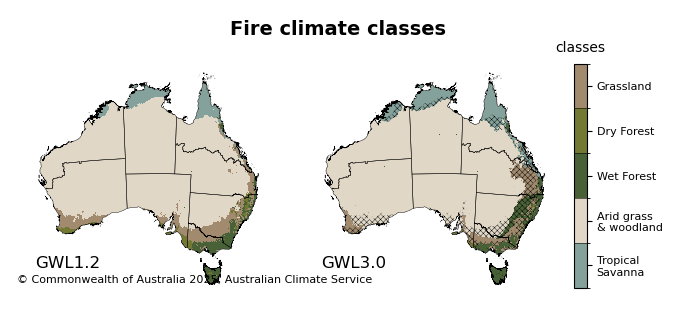

In [11]:
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0.nc")

plot_acs_hazard_2pp(ds1=ds_gwl12[var],
                    ds2=ds_gwl30[var],
                    stippling2=(ds_gwl12[var]!=ds_gwl30[var]).coarsen(lat=2, boundary="pad").mean().coarsen(lon=2, boundary="pad").mean()>0.3,
                    regions = regions,
                    title = "Fire climate classes",
                    subplot_titles=["GWL1.2", "GWL3.0"],
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="horizontal",
                    issued_date="",
                   )

(<Figure size 670x450 with 4 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

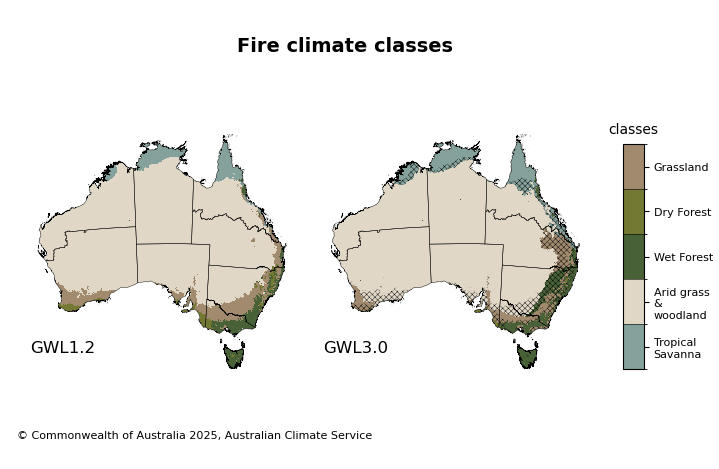

In [12]:
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0.nc")

plot_acs_hazard_multi(ds_list=[ds_gwl12[var],ds_gwl30[var]],
                    stippling_list=[None,(ds_gwl12[var]!=ds_gwl30[var]).coarsen(lat=2, boundary="pad").mean().coarsen(lon=2, boundary="pad").mean()>0.3],
                      ncols=2,
                      nrows=1,
                    regions = regions,
                    title = "Fire climate classes",
                    subplot_titles=["GWL1.2", "GWL3.0"],
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    issued_date="",
                      cbar_location="right",
                   )

(<Figure size 300x500 with 3 Axes>,
 array([<GeoAxes: >, <GeoAxes: >], dtype=object))

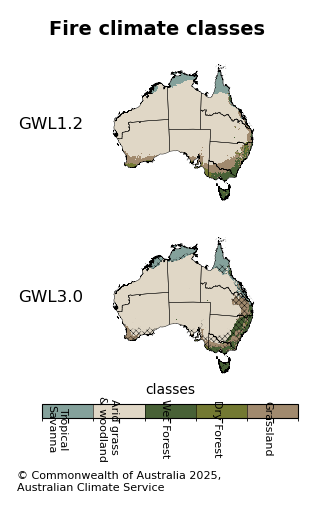

In [13]:
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl30 = xr.open_dataset("/g/data/ai05/ag0498/Projects/climate_classifications/fire_climate_classes_BARPA_GWL3.0.nc")

plot_acs_hazard_2pp(ds1=ds_gwl12[var],
                    ds2=ds_gwl30[var],
                    stippling2=(ds_gwl12[var]!=ds_gwl30[var]).coarsen(lat=2, boundary="pad").mean().coarsen(lon=2, boundary="pad").mean()>0.3,
                    regions = regions,
                    title = "Fire climate classes",
                    subplot_titles=["GWL1.2", "GWL3.0"],
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="vertical",
                    issued_date="",
                   )

(<Figure size 300x650 with 4 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

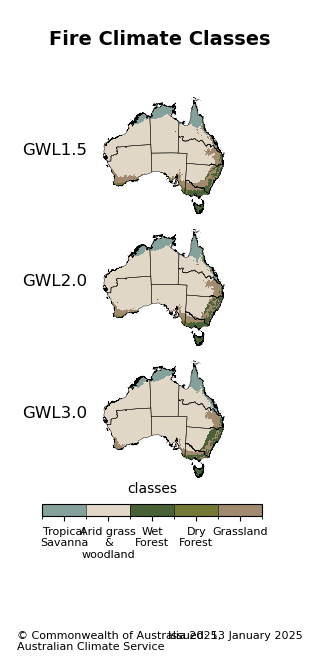

In [14]:
plot_acs_hazard_3pp(ds_gwl15=ds_gwl15[var],
                    ds_gwl20=ds_gwl20[var],
                    ds_gwl30=ds_gwl30[var],
                    title = "Fire Climate Classes",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n&\nwoodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    watermark="",
                    orientation="vertical",
                    tick_rotation=0,
                    # issued_date="",
                    )

CPU times: user 10.5 s, sys: 52.9 ms, total: 10.5 s
Wall time: 11.7 s


(<Figure size 600x450 with 5 Axes>,
 array([[<GeoAxes: >, <GeoAxes: >],
        [<GeoAxes: >, <GeoAxes: >]], dtype=object))

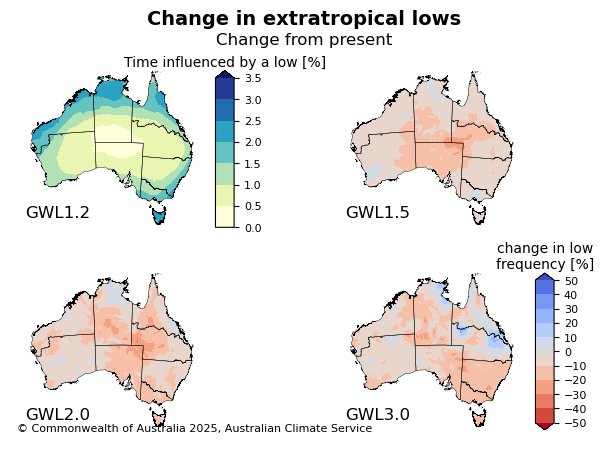

In [15]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = np.arange(-50,51,10),
                         cbar_label = "change in low frequency [%]",
                         # dataset_name = "AGCD bias corrected, multi-model",
                         issued_date="",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square"
                        )

CPU times: user 7.04 s, sys: 13.1 ms, total: 7.05 s
Wall time: 7.05 s


(<Figure size 1000x300 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

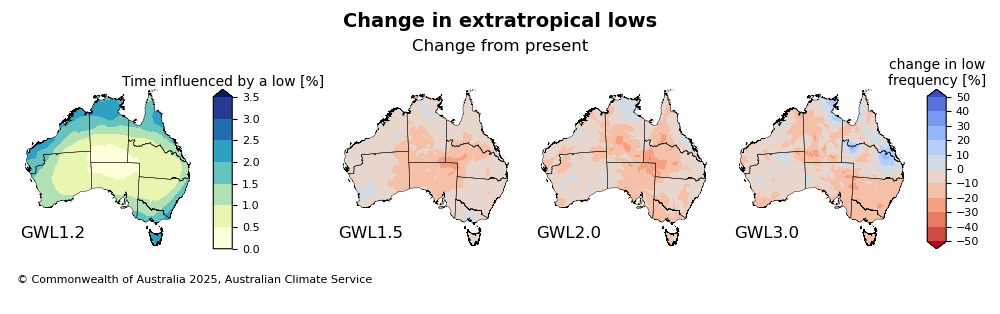

In [16]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = np.arange(-50,51,10),
                         cbar_label = "change in low frequency [%]",
                         # dataset_name = "AGCD bias corrected, multi-model",
                         issued_date="",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="horizontal",
                        )

CPU times: user 6.11 s, sys: 21.6 ms, total: 6.13 s
Wall time: 6.13 s


(<Figure size 300x800 with 5 Axes>,
 array([<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >], dtype=object))

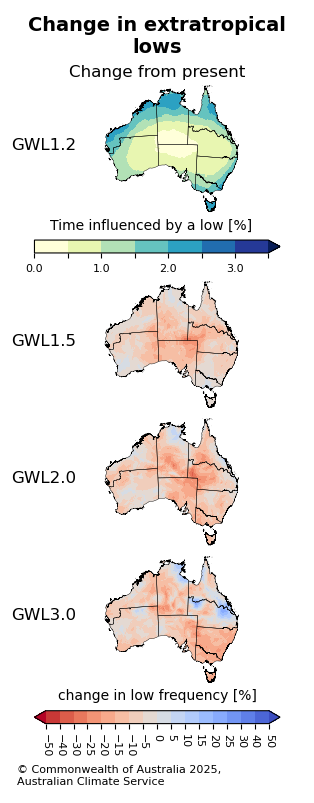

In [17]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         # baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks =[-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         # tick_interval=2,
                       # tick_rotation=0,
                       cbar_label = "change in low frequency [%]",
                         # dataset_name = "AGCD bias corrected, multi-model",
                           issued_date="",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                       gwl12_tick_interval=2,
                       gwl12_tick_rotation=0,
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical"
                        )

# Flexible Multi panelled plotting

CPU times: user 7.27 s, sys: 17.5 ms, total: 7.29 s
Wall time: 7.34 s


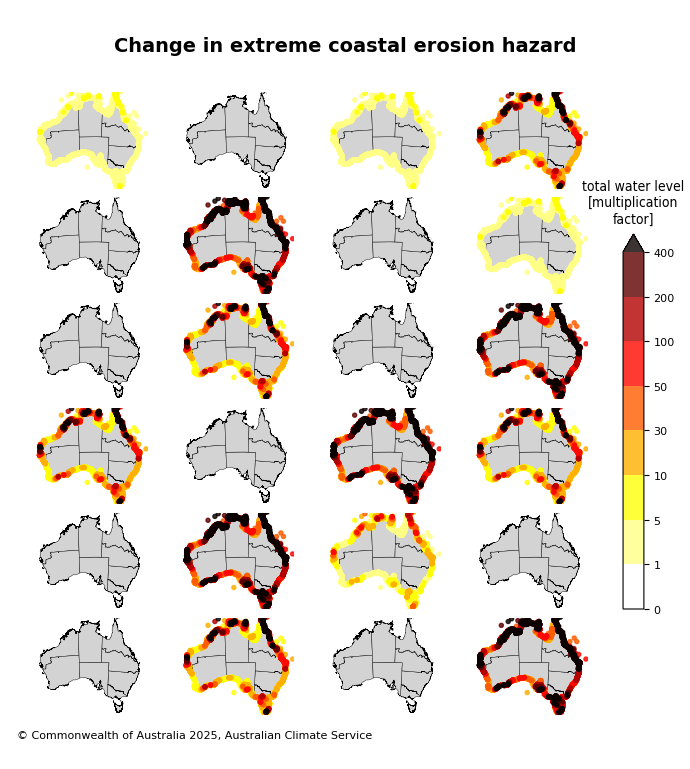

In [18]:
%%time 
# plot many station data including with missing data

#The MTWL MF is primarily a metric to evaluate the increase in coastal erosion for ocean coasts.

var = "MTWL_MFSLR_50"

df_slr020 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR14cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)
df_slr038 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR32cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)
df_slr060 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR54cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)
df_slr100 = pd.read_csv("/g/data/ia39/ncra/coastal/MF/difference_files/MFSLR_ACSSH_MMALL_SLR94cm.csv")\
.rename(columns={"latitude":"lat", "longitude":"lon"})[["lat", "lon", var]].sort_values(var)

plot_acs_hazard_multi(station_dfs=[df_slr020, None, df_slr020,  df_slr060, None, df_slr100, 
                                 None,df_slr020, None, df_slr060, None, df_slr100, 
                                 df_slr060, None, df_slr100,  df_slr060, None, df_slr100, 
                                 df_slr038, None,None, df_slr060, None, df_slr100, ],
                    ncols=4, 
                    nrows=6,
                    figsize=(6.7,7.5),
                    regions = regions,
                    cmap=cmap_dict["EHF_duration"],
                    ticks=[0,1,5,10,30,50,100,200, 400],
                    cbar_extend="max",
                    title = "Change in extreme coastal erosion hazard",
                    # date_range = " open ocean sandy beaches",
                    cbar_label = "total water level [multiplication factor]",
                      cbar_location="right",
                    watermark=None,
                    facecolor="lightgrey",
                    issued_date="",
                    tick_rotation=0,
);


CPU times: user 19.2 s, sys: 128 ms, total: 19.3 s
Wall time: 20 s


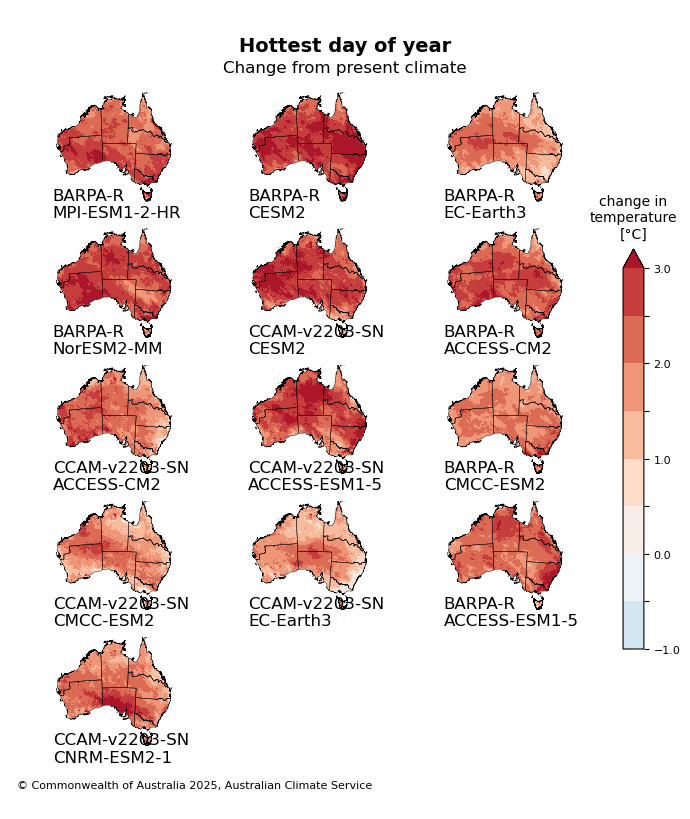

In [22]:
%%time 
var="TXx"
ds_list = [xr.open_dataset(file) for file in
           glob(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/individual_models/GWL-change/*GWL30-GWL12-change.nc")]

plot_acs_hazard_multi(ds_list=[ds[var] for ds in ds_list],
                    ncols=3, 
                    nrows=5,
                    figsize=(6.7,8),
                    regions = regions,
                    title = "Hottest day of year",
                    date_range = f"Change from present climate",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-1, 3.1, 0.5),
                    vcentre=0,
                    tick_interval=2,
                    cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                    subplot_titles=[f"{ds.downscaling_model}\n{ds.driving_model}" for ds in ds_list],
                    watermark="",
                    cbar_extend="max",
                    cbar_location="right",
                    issued_date="",
                    tick_rotation=0,
);


CPU times: user 18.9 s, sys: 123 ms, total: 19 s
Wall time: 19.2 s


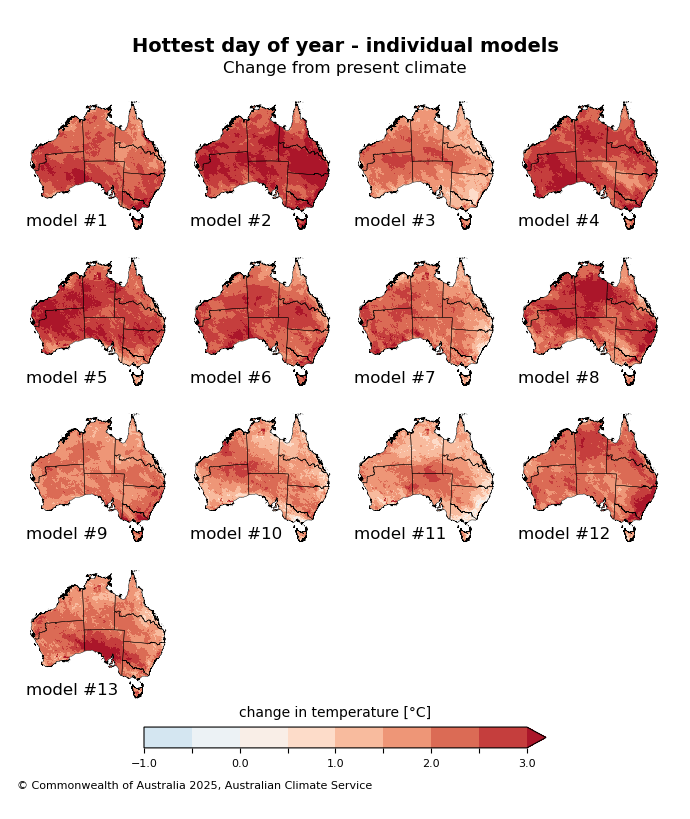

In [20]:
%%time 

# plot hazard for each model

var="TXx"
ds_list = [xr.open_dataset(file) for file in
           glob(f"/g/data/ia39/ncra/heat/data/{var}/bias-corrected/individual_models/GWL-change/*GWL30-GWL12-change.nc")]

plot_acs_hazard_multi(ds_list=[ds[var] for ds in ds_list],
                    ncols=4, 
                    nrows=4,
                    figsize=(6.7,8),
                    regions = regions,
                    title = "Hottest day of year - individual models",
                    date_range = f"Change from present climate",
                    cmap = cmap_dict["tas_anom"],
                    ticks = np.arange(-1, 3.1, 0.5),
                    tick_interval=2,
                    cbar_label = "change in temperature [\N{DEGREE SIGN}C]",
                    # subplot_titles=[f"{ds.downscaling_model}\n{ds.driving_model}" for ds in ds_list],
                    subplot_titles=[f"model #{i+1}" for i in np.arange(len(ds_list))],
                    watermark="",
                    cbar_extend="max",
                    cbar_location="bottom",
                    issued_date="",
                    tick_rotation=0,
vcentre=0,
);


CPU times: user 6.42 s, sys: 57.8 ms, total: 6.48 s
Wall time: 6.48 s


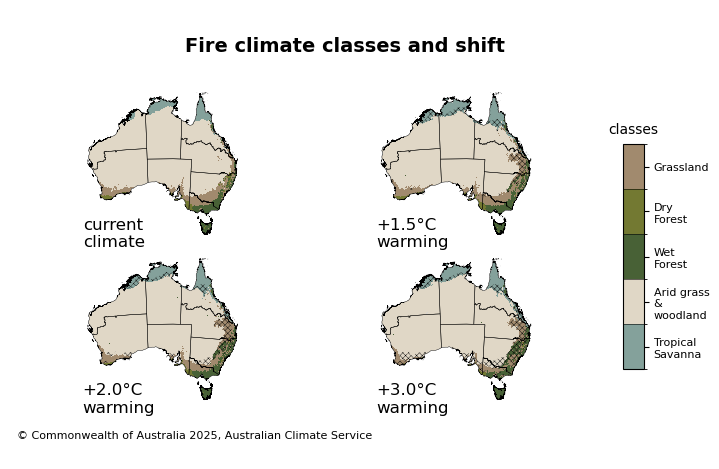

In [21]:
%%time 

# Fire climate classes plot with stippling

var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")

# coarsen the stippling to overcome the bug in the contourf hatching which gets confused with the fuzzy edges
stippling_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL15.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL2.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5
stippling_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_shift_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12_to_GWL3.nc")\
.coarsen(lat=10, boundary="pad").mean().coarsen(lon=10, boundary="pad").mean()[var]>0.5

plot_acs_hazard_multi(ds_list=[ds_gwl12[var], ds_gwl15[var], ds_gwl20[var], ds_gwl30[var]],
                      stippling_list = [None,stippling_gwl15,stippling_gwl20,stippling_gwl30,],
                      ncols=2,
                    nrows=2,
                    regions = regions,
                    title = "Fire climate classes and shift",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass\n&\nwoodland","Wet\nForest","Dry\nForest","Grassland",],
                    cbar_label = "classes",
                    subplot_titles=["current\nclimate",
                                        "+1.5\N{DEGREE SIGN}C\nwarming",
                                        "+2.0\N{DEGREE SIGN}C\nwarming",
                                        "+3.0\N{DEGREE SIGN}C\nwarming"],
                    watermark="",
                    issued_date = "",
                    tick_rotation=0,
                      cbar_location="right",
                    );